In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from scipy import stats
from random import random
from mip import Model, minimize, BINARY, INTEGER, CONTINUOUS, xsum 

In [26]:
df = pd.read_csv('bank_customer_churn.csv')
##df
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [25]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [28]:
df = df.drop('CustomerId', axis=1)

In [29]:
yesno_columns = ['Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']

In [31]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [34]:
###Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=2318274)

In [35]:
###Logistics Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
lr = LogisticRegression(solver='newton-cg', random_state=2184757)

In [39]:
lr.fit(X_train, y_train)

C:\Users\hermanowyczn\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hermanowyczn\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hermanowyczn\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hermanowyczn\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hermanowyczn\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm

LogisticRegression(random_state=2184757, solver='newton-cg')

In [40]:
y_pred = lr.predict(X_test)

In [41]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
###
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      6401
           1       0.18      0.11      0.13      1599

    accuracy                           0.73      8000
   macro avg       0.49      0.49      0.49      8000
weighted avg       0.68      0.73      0.70      8000

0.728125


In [45]:
###Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=2381234)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2381234)

In [47]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [49]:
accuray = (y_pred == y_test).astype(int).sum()/len(y_test); accuray

0.789

In [50]:
precision =  y_test[y_pred == True].sum()/(y_pred==True).sum(); precision

0.47368421052631576

In [51]:
recall =  y_pred[y_test == True].sum()/(y_test==True).sum(); recall

0.50093808630394

In [52]:
f1 = 2 * precision * recall / (precision + recall); f1

0.4869300911854103

In [53]:
clf.get_depth()

20

In [56]:
###Visualization
import matplotlib.pyplot as plt
from sklearn import tree

clf2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.1, random_state=2381234)

In [57]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.1, random_state=2381234)

[Text(852.2181818181818, 398.64, 'Age <= 44.5\ngini = 0.342\nsamples = 2000\nvalue = [1562, 438]'),
 Text(608.7272727272727, 326.15999999999997, 'Germany <= 0.5\ngini = 0.241\nsamples = 1492\nvalue = [1283, 209]'),
 Text(486.9818181818182, 253.67999999999998, 'Male <= 0.5\ngini = 0.197\nsamples = 1120\nvalue = [996, 124]'),
 Text(243.4909090909091, 181.2, 'NumOfProducts <= 1.5\ngini = 0.254\nsamples = 488\nvalue = [415, 73]'),
 Text(121.74545454545455, 108.71999999999997, 'gini = 0.312\nsamples = 238\nvalue = [192, 46]'),
 Text(365.23636363636365, 108.71999999999997, 'gini = 0.193\nsamples = 250\nvalue = [223, 27]'),
 Text(730.4727272727273, 181.2, 'Age <= 37.5\ngini = 0.148\nsamples = 632\nvalue = [581, 51]'),
 Text(608.7272727272727, 108.71999999999997, 'EstimatedSalary <= 94959.328\ngini = 0.105\nsamples = 415\nvalue = [392, 23]'),
 Text(486.9818181818182, 36.23999999999995, 'gini = 0.091\nsamples = 209\nvalue = [199, 10]'),
 Text(730.4727272727273, 36.23999999999995, 'gini = 0.118\

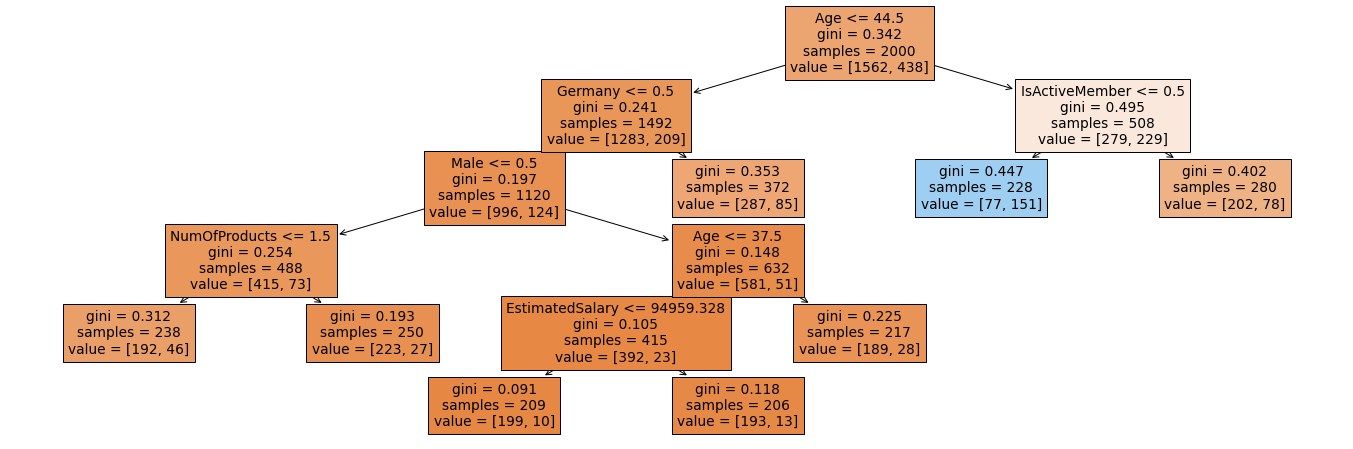

In [58]:
plt.figure(figsize=(24,8))
tree.plot_tree(clf2, feature_names=X.columns, filled=True)